| Technological Institute of the Philippines | Quezon City - Computer Engineering |
| ----------------------------------------- | ----------------------------------- |
| Course Code:                            | CPE 018                            |
| Code Title:                            | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision |
| 1st Semester                           | AY 2023-2024                        |
| <hr> | <hr> |
| **ACTIVITY NO.**                        | **FINAL PROJECT**                           |
| Name                                  | Cuevas, Christian Jay L.            |
|                                       | Capalungan, James                   |
|                                       | Catorce, Mayah Mae                  |
|                                       | Cortez, Angelica                    |
|                                       | de Leon, Bryan Paul                 |
| Section                               | CPE31S1                            |
| Date Performed                        | 11/27/2023                         |
| Date Submitted                        | 12/5/2023                         |
| Instructor                            | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard |
| <hr> | <hr> |

### 1. TITLE: "Enhancing Produce Quality Control: Automating Freshness Assessment Using OpenCV with Price Tagging."

- This is a fresh fruits and rotten fruits classifier trained with HOG Features of 10,901 dataset images. We also programmed a simple price tagging code that can be further improved. HOG or Histogram of Gradient is a very useful computer vision method that can extract features of objects with distinct shapes. It will process the gradients of the picture by convoluting it and extract the distinct keypoints of that image.

### 2. PROBLEM:

-  Identifying the freshness of the fruit/vegetable requires manual labor and we need the condition of each fruits manually. This helps the reduce the manual labor and keep in check the status of the fruits/vegetable. This can also be implemented in warehouses, to monitor the freshness of the fruits/vegetable.

### 3. IMPLEMENTATION:

In [ ]:
#ALL THE IMPORTS OF THE PROGRAM
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
from skimage import exposure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import glob

In [ ]:
#Used to extract HoG Features from the images.
def FtrExtractHOG(img):
    #Feature Extraction using HOG
    ftr,_=hog(img, orientations=8, pixels_per_cell=(16, 16),
            cells_per_block=(1, 1), visualize=True)
    return ftr


In [ ]:
#Used to extract color histogram from the images
def FtrExtractColorHist(img):
    chans = cv2.split(img)
    colors = ("h", "s", "v")
    features = []

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)
    return np.array(features).flatten()

In [ ]:
#Used to preprocess images for HOG extraction
def preprocessing1(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img = cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (72, 72),anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

In [ ]:
#Function that loops every element in array to extract the HOG
def featureExtraction1(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(FtrExtractHOG(arr[i]))
    return arr_feature

In [ ]:
#Used to preprocess images for Color Histogram extraction
def preprocessing2(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=matplotlib.colors.rgb_to_hsv(arr[i])
        arr_prep.append(img)
    return arr_prep

In [ ]:
#Function that loops every element in array to extract the Color Histogram
def featureExtraction2(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(FtrExtractColorHist(arr[i]))
    return arr_feature

TESTING FOR FRESH AND ROTTEN

In [ ]:
#This code will load the files with string name ending with ".png" in the test folder.
def loadimage(arr,n,name_of_fruit):
    label=[]
    for i in range(n):
        strr = "test/"+name_of_fruit+"_"+str(i+1)+"/*.png"
        #print(strr)
        for file in glob.glob(strr):
            img=np.asarray(plt.imread(file))
            #original  img1=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            img1=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            img2= cv2.resize(img1, (72, 72))
            arr.append(img2)
            label.append(name_of_fruit)
    return arr,label

freshapples=[]
freshbanana =[]
freshoranges=[]
rottenapples=[]
rottenbanana =[]
rottenoranges=[]

#This code will store the appended images to array freshapples and the label to array label_freshapples
freshapples,label_freshapples=loadimage(freshapples,1,"freshapples")
freshbanana,label_freshbanana=loadimage(freshbanana,1,"freshbanana")
freshoranges,label_freshoranges=loadimage(freshoranges,1,"freshoranges")
rottenapples,label_rottenapples=loadimage(rottenapples,1,"rottenapples")
rottenbanana,label_rottenbanana=loadimage(rottenbanana,1,"rottenbanana")
rottenoranges,label_rottenoranges=loadimage(rottenoranges,1,"rottenoranges")


freshapples_array = np.array(freshapples)
freshbanana_array = np.array(freshbanana)
freshoranges_array = np.array(freshoranges)
rottenapples_array = np.array(rottenapples)
rottenbanana_array = np.array(rottenbanana)
rottenoranges_array = np.array(rottenoranges)


# Create a DataFrame
raw_atributte = {
    'CLASS': ['Fresh Apple', 'Fresh Banana', 'Fresh Orange', 'Rotten Apple', 'Rotten Banana', 'Rotten Orange'],
    'NUMBER': [freshapples_array.shape[0], freshbanana_array .shape[0], freshoranges_array.shape[0], rottenapples_array.shape[0],
               rottenbanana_array.shape[0], rottenoranges_array.shape[0]]
}
atributte = pd.DataFrame(raw_atributte, columns=['CLASS', 'NUMBER'])

# Display the DataFrame
print(atributte)

           CLASS  NUMBER
0    Fresh Apple    1693
1   Fresh Banana    1581
2   Fresh Orange    1466
3   Rotten Apple    2342
4  Rotten Banana    2224
5  Rotten Orange    1595


Full Dataset


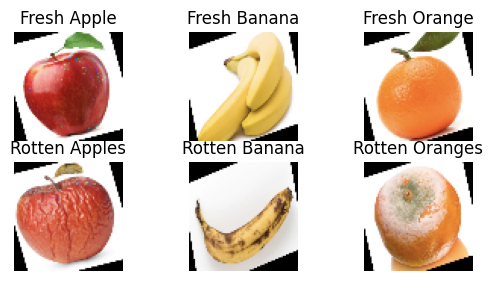

In [ ]:
#This code is just to show the images in the dataset
print('Full Dataset')
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Fresh Apple')
ax1.set_axis_off()
ax1.imshow(cv2.cvtColor(freshapples[0], cv2.COLOR_HSV2RGB))

ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Fresh Banana')
ax2.set_axis_off()
ax2.imshow(cv2.cvtColor(freshbanana[0], cv2.COLOR_HSV2RGB))

ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Fresh Orange')
ax3.set_axis_off()
ax3.imshow(cv2.cvtColor(freshoranges[0], cv2.COLOR_HSV2RGB))

ax4 = fig.add_subplot(3,3,4)
ax4.set_title('Rotten Apples')
ax4.set_axis_off()
ax4.imshow(cv2.cvtColor(rottenapples[0], cv2.COLOR_HSV2RGB))

ax5 = fig.add_subplot(3,3,5)
ax5.set_title('Rotten Banana')
ax5.set_axis_off()
ax5.imshow(cv2.cvtColor(rottenbanana[0], cv2.COLOR_HSV2RGB))

ax6 = fig.add_subplot(3,3,6)
ax6.set_title('Rotten Oranges')
ax6.set_axis_off()
ax6.imshow(cv2.cvtColor(rottenoranges[0], cv2.COLOR_HSV2RGB))


In [ ]:
#This code is used to concatenate the arrays to X_Shapedes and y_Shapedes
X_Shapedes =np.concatenate((freshapples,freshbanana,freshoranges,rottenapples,rottenbanana,rottenoranges))
y_Shapedes =np.concatenate((label_freshapples,label_freshbanana,label_freshoranges,label_rottenapples,label_rottenbanana,label_rottenoranges))

In [ ]:
#This code is used to split the dataset into images that will be trained and images that will be tested with the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_Shapedes, y_Shapedes, test_size=0.33, random_state=42)

In [ ]:
#This code is to call the function preprocessing1 to process the X_train array. This will append a new set of images that was converted into GRAYSCALE and also resized.
X_trainp=preprocessing1(X_train)
X_testp=preprocessing1(X_test)


In [ ]:
#This code will extract the HOG features of the arrays that was preprocessed.
X_trainftr=featureExtraction1(X_trainp)
X_testftr=featureExtraction1(X_testp)


In [ ]:
#This calls the KNearestNeighbor Classifier and it trains the classifier on the array X_trainftr which is the array of the images and the y_train which is the array of the labels.
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=7)
knn_clf.fit(X_trainftr, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7, weights='distance')

In [ ]:
#This function is for processing the frames of the live feed and returning the prediction that was made with the KNN Classifier
def process_frame(frame):
    arr = []
    img=np.array(frame)
    img1=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img2= cv2.resize(img1, (72, 72))
    arr.append(img2)
    # Preprocess the frame
    frame_prep = preprocessing1(arr)
    # Extract features from the preprocessed frame
    frame_ftr = featureExtraction1(frame_prep)
    # Predict the class using the trained KNN model
    prediction = knn_clf.predict(frame_ftr)[0]
    return prediction

In [ ]:
#This code is used for the running the window and the camera live feed. This code will get the frame, pass it to process_frame,
#and then it will test if the prediction variable is equal to the labels. It will display the prediction and then the price that was set
cap = cv2.VideoCapture(2)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if frame is None:
      break

    # Process the frame
    prediction = process_frame(frame)

    if prediction == "freshapples":
    # Display the result on the frame
      cv2.putText(frame, f"Prediction: {prediction}", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      cv2.putText(frame, "Price: 10 Pesos", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif prediction == "freshoranges":
      cv2.putText(frame, f"Prediction: {prediction}", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      cv2.putText(frame, "Price: 15 Pesos", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif prediction == "freshbanana":
      cv2.putText(frame, f"Prediction: {prediction}", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      cv2.putText(frame, "Price: 20 Pesos", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif prediction == "rottenapples":
      cv2.putText(frame, f"Prediction: {prediction}", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      cv2.putText(frame, "Price: 0 Pesos", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif prediction == "rottenoranges":
      cv2.putText(frame, f"Prediction: {prediction}", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 0, 255), 2)
      cv2.putText(frame, "Price: 0 Pesos", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 0, 255), 2)

    elif prediction == "rottenbanana":
      cv2.putText(frame, f"Prediction: {prediction}", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      cv2.putText(frame, "Price: 0 Pesos", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    # Display the frame

    cv2.imshow('Live Feed', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

#### TESTS MADE:

<img src = "https://cdn.discordapp.com/attachments/961069393234767882/1181187150893559868/image.png?ex=65802542&is=656db042&hm=d720982ff90458d18aa8c108f84be47f465f83d4e35f3644d478088c4f2075d7&">

<img src = "https://cdn.discordapp.com/attachments/961069393234767882/1181187998566584430/image.png?ex=6580260c&is=656db10c&hm=8b70f4d20a819c4292f530d82cc949ddcf02fcc1b876ed186fb469206d45665b&">

<img src = "https://cdn.discordapp.com/attachments/961069393234767882/1181188137012183040/image.png?ex=6580262d&is=656db12d&hm=37a8b9b6867b06bf2236b55a78051a0811d48fc79c97a27eeb002ea3c8ecbbfb&">

<img src = "https://cdn.discordapp.com/attachments/961069393234767882/1181189312059035659/image.png?ex=65802745&is=656db245&hm=56d3a35133ebd2255d70c8e5b780cc31a3390aa41a02240c91feeeeef18688be&">

<img src = "https://cdn.discordapp.com/attachments/961069393234767882/1181189604582367252/image.png?ex=6580278b&is=656db28b&hm=549593eebc73c1d2405018647110c82b022850dfa21ee93c6bce4d092cce62a1&">

<img src = "https://cdn.discordapp.com/attachments/961069393234767882/1181189745041219645/image.png?ex=658027ac&is=656db2ac&hm=d92b410c41d0f15e4caa0030b294feb4c7a71c619c6ceb834b5fc29a6987ebbf&">

In [ ]:
#This code is used for testing the other part of the dataset
y_knn_pred = knn_clf.predict(X_testftr)


In [ ]:
#This code is used to see the accuracy of the matching of the classifier
print(accuracy_score(y_test, y_knn_pred)*100,'%')

91.99555308504725 %


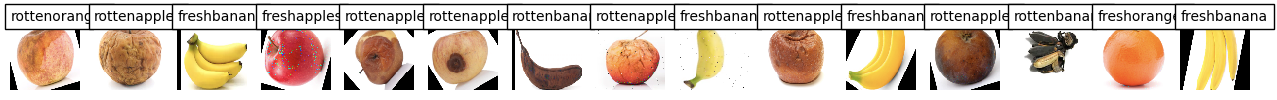

In [ ]:
#This code is used to show the objects that was matched with the labels using the KNN Classifier.
slice = 15

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_HSV2RGB), interpolation='nearest')
    plt.text(0, 0, y_knn_pred[i], color='black',
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')